# Hypotheses testing

Verify with 5% significance if the city of San Diego should have the 3rd symbol to be h according to the Köppen–Geiger climate classification system using temperature data from the year 2016.

<b>Symbol to be h, the annual average temperature should be above 18ºC.</b>

### Normality testing

In [84]:
%pylab inline
import pandas as pd
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


/home/jonathan/.virtualenvs/statistic/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
df = pd.read_csv('temperature.csv')
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
datetime             45253 non-null object
Vancouver            44458 non-null float64
Portland             45252 non-null float64
San Francisco        44460 non-null float64
Seattle              45250 non-null float64
Los Angeles          45250 non-null float64
San Diego            45252 non-null float64
Las Vegas            45252 non-null float64
Phoenix              45250 non-null float64
Albuquerque          45252 non-null float64
Denver               45252 non-null float64
San Antonio          45252 non-null float64
Dallas               45249 non-null float64
Houston              45250 non-null float64
Kansas City          45252 non-null float64
Minneapolis          45240 non-null float64
Saint Louis          45252 non-null float64
Chicago              45250 non-null float64
Nashville            45251 non-null float64
Indianapolis         45246 non-null float64
Atlanta     

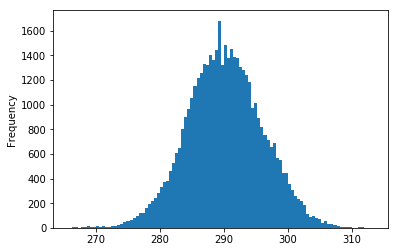

In [6]:
san_diego = df['San Diego']
san_diego.plot.hist(bins=100)

In [10]:
san_diego.describe()

count    45252.000000
mean       290.215044
std          5.889992
min        265.783333
25%        286.254750
50%        290.118750
75%        294.107542
max        313.360000
Name: San Diego, dtype: float64

Take the temperature in 2016

In [112]:
san_diego2016 = df[df.datetime.between('2016-01-01', '2016-12-31')]['San Diego']
san_diego2016

28476    289.164514
28477    288.020000
28478    281.512194
28479    284.450000
28480    283.443253
28481    282.350000
28482    282.020000
28483    280.730000
28484    280.091962
28485    280.840000
28486    279.820000
28487    280.000000
28488    279.938838
28489    279.800000
28490    278.850000
28491    278.500000
28492    281.930000
28493    281.957698
28494    286.430000
28495    289.970000
28496    290.430000
28497    290.481242
28498    290.620000
28499    288.737888
28500    289.380000
28501    287.837325
28502    286.180000
28503    284.362079
28504    282.450000
28505    280.800000
            ...    
37206    291.480000
37207    295.130000
37208    298.740000
37209    299.980000
37210    300.500000
37211    298.930000
37212    296.760000
37213    294.240000
37214    293.000000
37215    291.330000
37216    290.390000
37217    289.220000
37218    288.470000
37219    287.770000
37220    287.770000
37221    286.550000
37222    286.500000
37223    285.980000
37224    284.550000


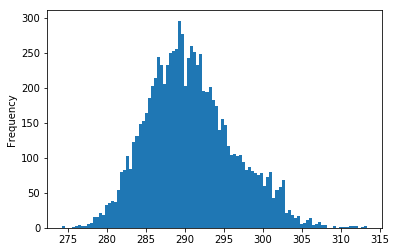

In [113]:
san_diego2016.plot.hist(bins=100)

In [114]:
description_san_diego2016 = san_diego2016.describe()
description_san_diego2016

count    8760.000000
mean      290.758129
std         5.606392
min       274.274000
25%       286.750000
50%       290.235000
75%       294.142500
max       313.360000
Name: San Diego, dtype: float64

/home/jonathan/.virtualenvs/statistic/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


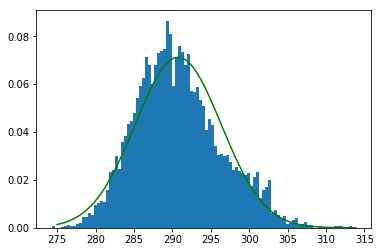

In [115]:
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(275, 314, 0.1)
plt.hist(san_diego2016, normed=True, bins=100)
plt.plot(x_axis, stats.norm.pdf(x_axis,description_san_diego2016['mean'],description_san_diego2016['std']), 'g')
plt.show()

It's seems that the temperature in San Diego on 2016 is distributed as a normal distribution. However, If we want to be more precisly, we should plot a [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

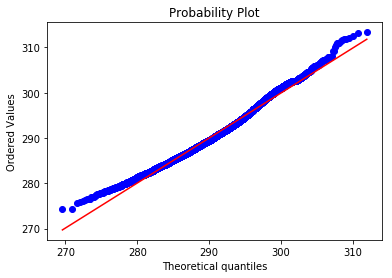

In [116]:
import statsmodels.api as sm
stats.probplot(san_diego2016, sparams=(description_san_diego2016['mean'], description_san_diego2016['std']), plot=plt)
plt.show()

## Test hypothesis

The temperatures given in the dataset is in Kelvin. To convert from Kelvin to ºC use [ºC]=[K]-273.15

In [117]:
san_diego2016C = san_diego2016.map(lambda x: x - 273.15)
description_san_diego2016C = san_diego2016C.describe()
description_san_diego2016C

count    8760.000000
mean       17.608129
std         5.606392
min         1.124000
25%        13.600000
50%        17.085000
75%        20.992500
max        40.210000
Name: San Diego, dtype: float64

In [119]:
assert san_diego2016C.describe()['mean'] - (description_san_diego2016['mean'] - 273.15) < 10**-13
assert san_diego2016C.describe()['std'] == description_san_diego2016['std']

So, the hypothesis will be:
\begin{align}
{\bf{H_{0}}}: \text{The annual average temperature of San Diego is above 18 °C}\\
{\bf{H_{A}}}: \text{The annual average temperature of San Diego is less than 18 °C}\\
\end{align}

It's mean:
\begin{align}
{\bf{H_{0}}}: \mu > 18\\
{\bf{H_{A}}}: \mu <= 18\\
\end{align}

Where:
\begin{align}
z_{p} = \frac{\bar{X} - \mu}{{S}/{\sqrt{n}}} \\
{\bf{H_{0}}}: z_{p} \text{ is distributed by } N(0, 1)\\
{\bf{H_{A}}}: \mu_{z_{p}} > 0\\
\end{align}

Because $\sigma^2$ is not given, we have to estimate with the estimator $S^2$. So, we have two options:
    - Z-test: with normal distribution.
    - T-test: with students distribution.
I think Z-test will fit our problem because we have a large amount of data 8760 samples to be exaclty.

$\alpha = 5 \%$

$p-value = P_{H_{0}}(Z <= z) < \alpha$

In [144]:
mu = 18
alpha = 0.05
z_value = sqrt(description_san_diego2016C['count']) * (description_san_diego2016C['mean'] - mu) / description_san_diego2016C['std']
p_value = stats.norm.pdf(z_value)
p_value <= alpha

True

Because $p-value <= \alpha$, we can say that we accept the alternative hypothesis which means that the annual temperature of San Diego is less than 18°C, so that the $h$ doesn't correspond to San Diego.